In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

In [3]:
raw_df = pd.read_csv('C:/Users/jiyeon/OneDrive - 강원대학교/kma_pjt/data/일단있는애들먼저4.csv', encoding="CP949") 
raw_df.drop(['Unnamed: 0'], axis=1, inplace=True)
raw_df.head()

,yyyymmdd,add,sex,frequency,avg_ta_x,max_ta_x,min_ta_x,min_mrng_ta_x,max_dytm_ta_x,min_nght_ta_x,...,co,o3,no2,pm10,avg_ta_y.1,max_ta_y.1,min_ta_y.1,min_mrng_ta_y,max_dytm_ta_y,min_nght_ta_y
0,20120101,강원,1,3,-3.804615,0.411282,-8.386667,-5.592308,0.383590,-10.593333,...,1.012879,0.019098,0.020873,84.337500,-3.942333,0.378444,-8.701667,-5.831667,0.356222,-10.868222
1,20120101,강원,2,3,-3.804615,0.411282,-8.386667,-5.592308,0.383590,-10.593333,...,1.012879,0.019098,0.020873,84.337500,-3.942333,0.378444,-8.701667,-5.831667,0.356222,-10.868222
2,20120101,경기,1,4,-3.987711,0.339116,-8.952530,-5.113253,0.283213,-12.036867,...,0.978231,0.011926,0.030821,86.678511,-3.964823,0.402788,-8.883540,-5.095310,0.342389,-12.000575
3,20120101,경기,2,5,-3.987711,0.339116,-8.952530,-5.113253,0.283213,-12.036867,...,0.978231,0.011926,0.030821,86.678511,-3.964823,0.402788,-8.883540,-5.095310,0.342389,-12.000575
4,20120101,경남,1,2,0.502326,5.804651,-4.083721,-2.430233,5.804651,-7.290698,...,0.653175,0.021260,0.017499,62.025845,0.549818,6.053455,-4.010545,-2.676000,6.053455,-7.045455


In [4]:
condition = (raw_df['add']=='서울') & (raw_df['sex']==1) 
seoul_1 = raw_df.copy()[condition]
seoul_1.drop(['add', 'sex'], axis=1, inplace=True)
seoul_1.describe()

,yyyymmdd,frequency,avg_ta_x,max_ta_x,min_ta_x,min_mrng_ta_x,max_dytm_ta_x,min_nght_ta_x,avg_ps_x,max_ps_x,...,co,o3,no2,pm10,avg_ta_y.1,max_ta_y.1,min_ta_y.1,min_mrng_ta_y,max_dytm_ta_y,min_nght_ta_y
count,1.461000e+03,1461.00000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,...,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,2.013566e+07,3.65024,12.845728,17.614296,8.748829,9.234287,17.483995,9.162266,1016.091102,1018.698494,...,0.578762,0.019423,0.037774,45.407202,12.900774,17.651805,8.837437,9.313955,17.520741,9.244919
std,1.119295e+04,2.04977,10.638229,10.988530,10.716847,10.640255,11.104681,10.653071,8.262597,8.313166,...,0.192788,0.010226,0.010271,21.599254,10.618974,10.982421,10.681389,10.604563,11.099490,10.617155
min,2.012010e+07,0.00000,-13.154167,-9.491667,-16.908333,-16.908333,-9.500000,-16.908333,992.900000,998.000000,...,0.232057,0.001953,0.010000,6.351319,-13.036000,-9.429333,-16.633333,-16.633333,-9.437333,-16.633333
25%,2.012123e+07,2.00000,3.454167,7.850000,-0.537500,0.179167,7.533333,0.041667,1009.400000,1011.700000,...,0.440397,0.011489,0.029559,30.127682,3.540000,7.897333,-0.480000,0.233333,7.533333,0.060000
50%,2.013123e+07,3.00000,14.145833,19.483333,9.641667,10.233333,19.466667,10.191667,1016.400000,1019.200000,...,0.529863,0.018090,0.037092,41.583333,14.203333,19.500000,9.740000,10.326667,19.473333,10.240000
75%,2.014123e+07,5.00000,22.603333,27.666667,18.507500,18.795833,27.662500,18.791667,1022.400000,1025.100000,...,0.662788,0.026391,0.046555,57.146341,22.626667,27.690000,18.543333,18.883333,27.676667,18.860000
max,2.015123e+07,12.00000,31.358333,36.583333,27.841667,27.929167,36.583333,27.870833,1037.600000,1039.500000,...,1.119462,0.057967,0.053175,100.000000,31.418667,36.591333,27.840000,27.936667,36.591333,27.876667


In [6]:
# 정규화 (Date 제외한 모든 수치부분 정규화)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scale_cols = ['avg_ta_x', 'max_ta_x', 'min_ta_x',
       'min_mrng_ta_x', 'max_dytm_ta_x', 'min_nght_ta_x', 'avg_ps_x',
       'max_ps_x', 'min_ps_x', 'avg_ta_y', 'max_ta_y', 'min_ta_y', 'avg_td_x',
       'max_td_x', 'max_td_hrmt_x', 'min_td_x', 'min_td_hrmt_x', 'avg_rhm',
       'min_rhm', 'avg_ps_y', 'max_ps_y', 'min_ps_y', 'avg_ta_x.1',
       'max_ta_x.1', 'min_ta_x.1', 'avg_td_y', 'max_td_y', 'max_td_hrmt_y',
       'min_td_y', 'min_td_hrmt_y', 'so2', 'co', 'o3', 'no2', 'pm10',
       'avg_ta_y.1', 'max_ta_y.1', 'min_ta_y.1', 'min_mrng_ta_y',
       'max_dytm_ta_y', 'min_nght_ta_y']

scaled_df = scaler.fit_transform(seoul_1[scale_cols])

scaled_df = pd.DataFrame(scaled_df, columns=scale_cols)

scaler_frq = StandardScaler()
scaled_df['frequency'] = scaler_frq.fit_transform(seoul_1['frequency'].values.reshape(-1,1))

# print(scaled_df)

In [7]:
# 입력 파라미터 feature, label => numpy type

def make_sequene_dataset(feature, label, window_size):

    feature_list = []      # 생성될 feature list
    label_list = []        # 생성될 label list

    for i in range(len(feature)-window_size):

        feature_list.append(feature[i:i+window_size])
        label_list.append(label[i+window_size])

    return np.array(feature_list), np.array(label_list)

In [12]:
# feature_df, label_df 생성
feature_df = pd.DataFrame(scaled_df, columns=scale_cols)
label_df = pd.DataFrame(scaled_df['frequency'])

In [13]:
# DataFrame => Numpy 변환

feature_np = feature_df.to_numpy()
label_np = label_df.to_numpy()

print(feature_np.shape, label_np.shape)

(1461, 41) (1461, 1)


In [26]:
# 시계열 데이터 생성 (make_sequence_dataset)

window_size = 7

X, Y = make_sequene_dataset(feature_np, label_np, window_size)

print(X.shape, Y.shape)

(1454, 7, 41) (1454, 1)


In [27]:
# 학습데이터, 테스트데이터 생성

# train, test 분리

# split = int(len(X)-365)

x_train = X[0:-365]
y_train = Y[0:-365]

x_test = X[-365:]
y_test = Y[-365:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1089, 7, 41) (1089, 1)
(365, 7, 41) (365, 1)


In [32]:
# 모델 구축 및 컴파일

# model 생성
from keras.layers import Dropout
model = Sequential()
# model.add(GRU(hidden_size, input_shape=(timesteps, input_dim)))
model.add(LSTM(128, activation='relu', input_shape=x_train[0].shape))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

# model.summary()

In [33]:
# 모델 학습 (EarlyStopping 적용)

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=20)

model.fit(x_train, y_train, 
          validation_data=(x_test, y_test),
          epochs=500, batch_size=365,
          callbacks=[early_stop])

Epoch 1/500
3/3 [==============================] - 2s 198ms/step - loss: 1.0249 - mse: 1.0249 - val_loss: 1.0188 - val_mse: 1.0188
Epoch 2/500
3/3 [==============================] - 0s 61ms/step - loss: 0.9988 - mse: 0.9988 - val_loss: 1.0212 - val_mse: 1.0212
Epoch 3/500
3/3 [==============================] - 0s 60ms/step - loss: 1.0116 - mse: 1.0116 - val_loss: 1.0287 - val_mse: 1.0287
Epoch 4/500
3/3 [==============================] - 0s 62ms/step - loss: 0.9997 - mse: 0.9997 - val_loss: 1.0282 - val_mse: 1.0282
Epoch 5/500
3/3 [==============================] - 0s 57ms/step - loss: 1.0062 - mse: 1.0062 - val_loss: 1.0292 - val_mse: 1.0292
Epoch 6/500
3/3 [==============================] - 0s 61ms/step - loss: 1.0061 - mse: 1.0061 - val_loss: 1.0307 - val_mse: 1.0307
Epoch 7/500
3/3 [==============================] - 0s 61ms/step - loss: 0.9817 - mse: 0.9817 - val_loss: 1.0315 - val_mse: 1.0315
Epoch 8/500
3/3 [==============================] - 0s 68ms/step - loss: 0.9949 - mse: 0.9

12/12 [==============================] - 0s 3ms/step


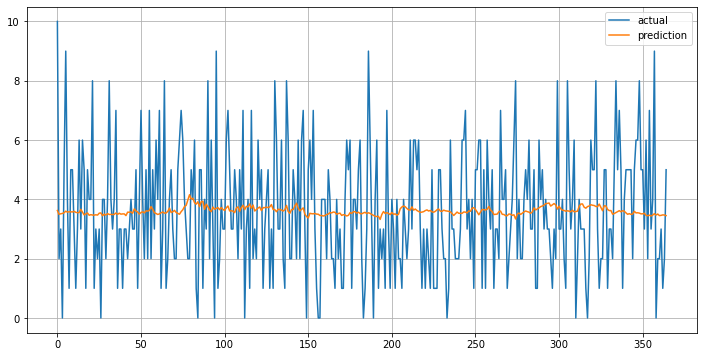

In [34]:
# 예측을 통한 정답과의 비교 (오차계산 MAPE 사용, 평균절대값백분율오차)

pred = model.predict(x_test)
rescaled_y_test = scaler_frq.inverse_transform(np.array(y_test).reshape(-1,1))
rescaled_pred = scaler_frq.inverse_transform(np.array(pred).reshape(-1,1))
plt.figure(figsize=(12, 6))
plt.plot(rescaled_y_test, label='actual')
plt.plot(rescaled_pred, label='prediction')
plt.grid()
plt.legend(loc='best')
# plt.title('{0}'.format('hi'))
plt.show()

In [35]:
# rmse
print(mean_squared_error(rescaled_y_test, rescaled_pred, squared=False))

2.081282657074694
